In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
df=pd.read_csv("Air_Quality.csv")
df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0


In [2]:
df.nunique()

id               1836
country             1
state              26
city              142
station           281
pollutant_id        7
last_update         1
pollutant_min     149
pollutant_max     340
pollutant_avg     237
dtype: int64

In [3]:
#Drop the null values
df_1=df.dropna()
df_1.nunique()

id               1738
country             1
state              26
city              142
station           280
pollutant_id        7
last_update         1
pollutant_min     149
pollutant_max     340
pollutant_avg     237
dtype: int64

In [4]:
df_1.drop('id',axis=1).describe()

,pollutant_min,pollutant_max,pollutant_avg
count,1738.000000,1738.000000,1738.000000
mean,28.414269,96.873418,54.100690
std,34.403811,104.765094,60.824158
min,1.000000,1.000000,1.000000
25%,5.000000,21.000000,12.000000
50%,14.000000,63.000000,31.000000
75%,39.000000,124.000000,70.000000
max,217.000000,500.000000,314.000000


In [5]:
#Check for any null values
df_1.isnull().sum()

id               0
country          0
state            0
city             0
station          0
pollutant_id     0
last_update      0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [6]:
df_1['pollutant_id'].describe()

count     1738
unique       7
top         CO
freq       269
Name: pollutant_id, dtype: object

<AxesSubplot:xlabel='pollutant_avg'>

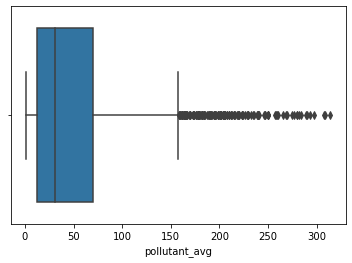

In [7]:
sns.boxplot(x=df_1['pollutant_avg'])

<AxesSubplot:xlabel='pollutant_max'>

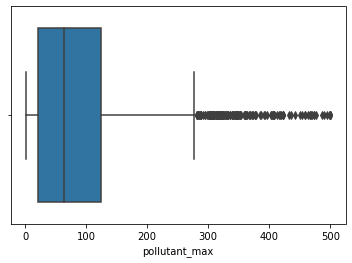

In [8]:
sns.boxplot(x=df_1['pollutant_max'])

<AxesSubplot:xlabel='pollutant_min'>

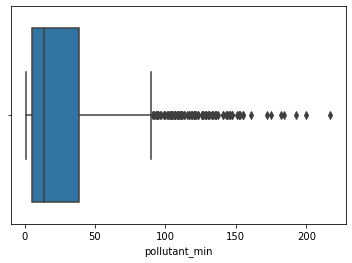

In [9]:
sns.boxplot(x=df_1['pollutant_min'])

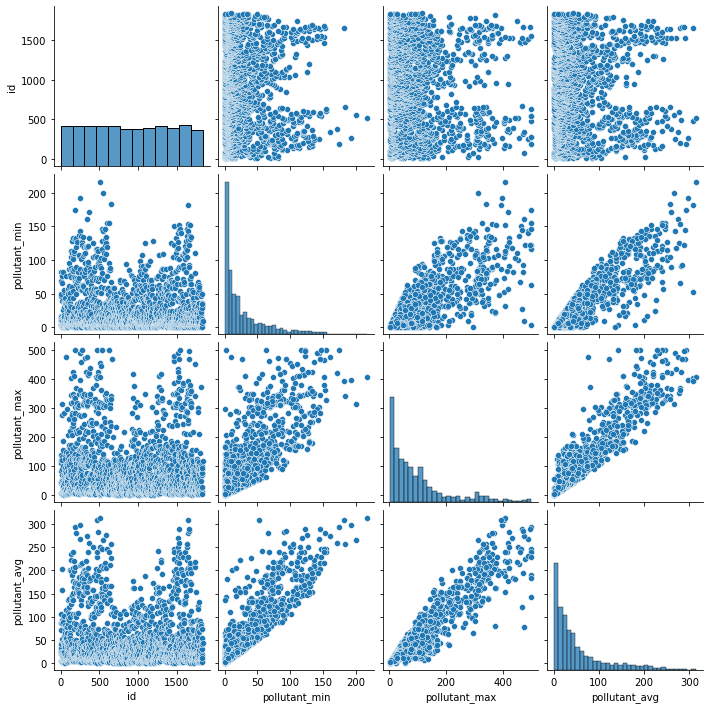

In [308]:
#use pairplot to see relationship between different columns
sns.pairplot(df_1,palette='coolwarm')

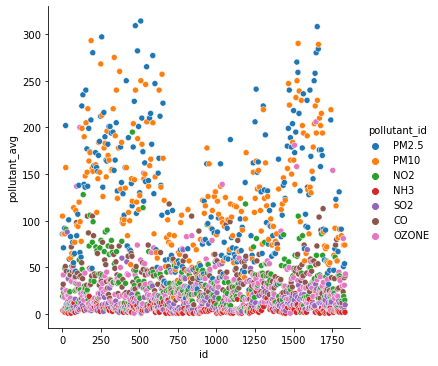

In [10]:
sns.relplot(x='id',y='pollutant_avg',hue='pollutant_id',data=df_1)

Text(0, 0.5, 'Pollutant average values')

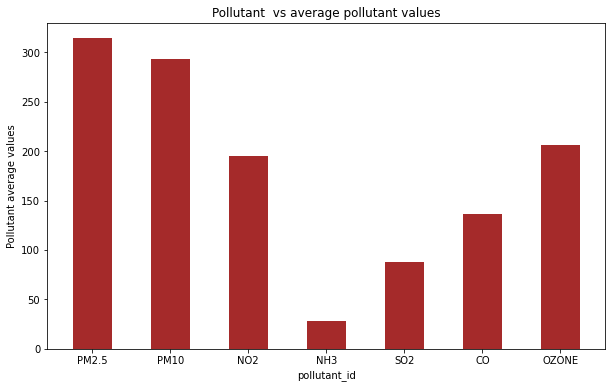

In [14]:
x_1=df_1['pollutant_id'].to_numpy()
Pol_avg=df_1['pollutant_avg'].to_numpy()
plt.figure(figsize=(10,6))
plt.bar(x_1,Pol_avg,color='brown',width=0.5)
plt.title('Pollutant  vs average pollutant values')
plt.xlabel('pollutant_id')
plt.ylabel('Pollutant average values')

# From the graph,the highest pollution is caused byPM2.5 and lowest by NH3.

# State-wise Average Pollutant Bar Graph

<Figure size 864x576 with 0 Axes>

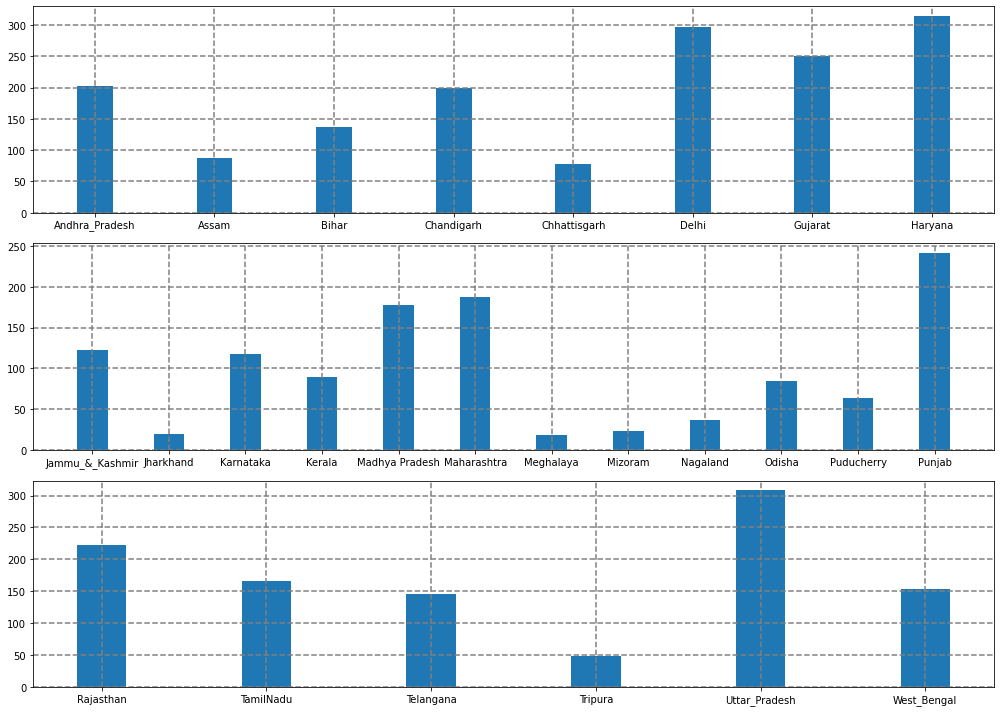

In [15]:
x_2=df_1['state'].to_numpy()
plt.figure(figsize=(12,8))
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(14,10))
axes[0].bar(x_2[0:643],Pol_avg[0:643],width=0.3)
axes[1].bar(x_2[644:1227],Pol_avg[644:1227],width=0.4)
axes[2].bar(x_2[1228:1737],Pol_avg[1228:1737],width=0.3)
axes[0].grid(True, color = "grey", linewidth = "1.5",ls='--')
axes[1].grid(True, color = "grey", linewidth = "1.5",ls='--')
axes[2].grid(True, color = "grey", linewidth = "1.5",ls='--')
plt.tight_layout()

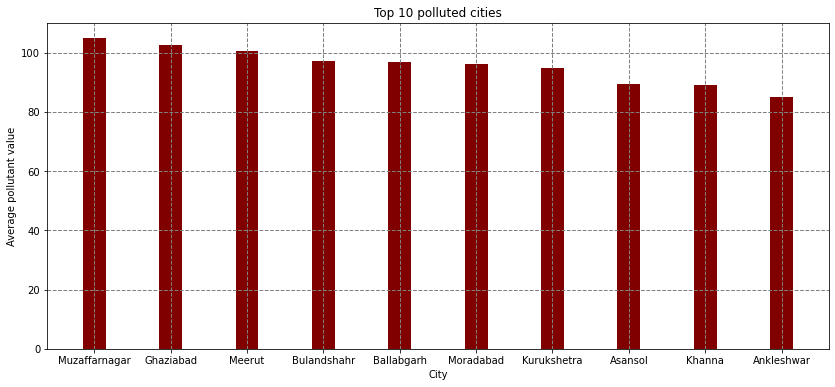

In [17]:
#Top 10 polluted cities
Pol_city=df.groupby(['city'])['pollutant_avg'].mean().nlargest(10).reset_index()
Pol_city
plt.figure(figsize=(14,6))
plt.bar(Pol_city['city'],Pol_city['pollutant_avg'],color='maroon',width=0.3)
plt.title('Top 10 polluted cities')
plt.xlabel('City')
plt.ylabel('Average pollutant value')
plt.grid(True, color = "grey", linewidth = "1",ls='--')

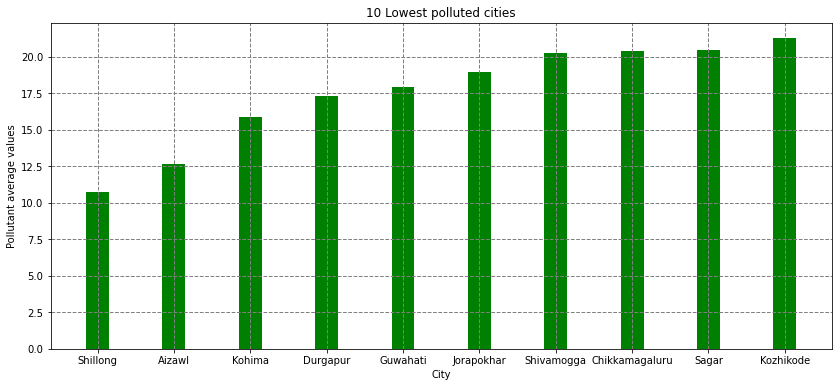

In [18]:
#10 lowest polluted cities
Lowpol_city=df.groupby(['city'])['pollutant_avg'].mean().nsmallest(10).reset_index()
plt.figure(figsize=(14,6))
plt.bar(Lowpol_city['city'],Lowpol_city['pollutant_avg'],color='green',width=0.3)
plt.title('10 Lowest polluted cities')
plt.xlabel('City')
plt.ylabel('Pollutant average values')
plt.grid(True, color = "grey", linewidth = "1",ls='--')

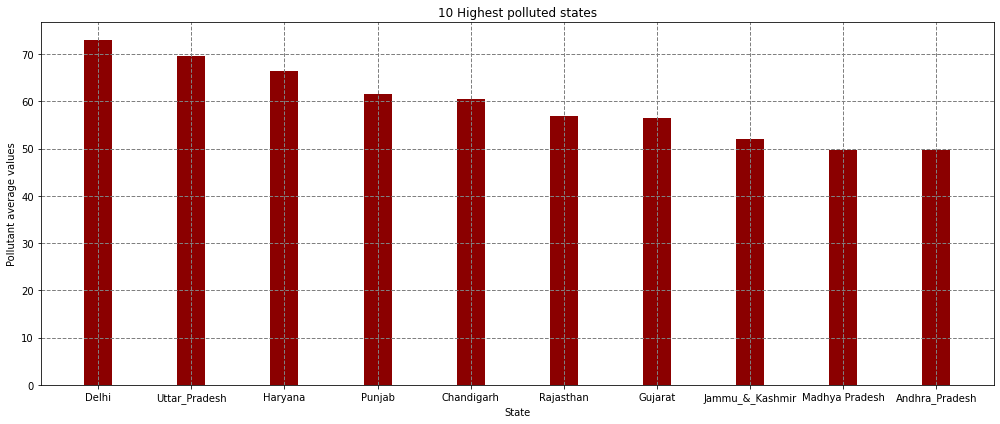

In [19]:
# Top 10 highest polluted states
Pol_state=df.groupby(['state'])['pollutant_avg'].mean().nlargest(10).reset_index()
plt.figure(figsize=(14,6))
plt.bar(Pol_state['state'],Pol_state['pollutant_avg'],color='darkred',width=0.3)
plt.title('10 Highest polluted states')
plt.xlabel('State')
plt.ylabel('Pollutant average values')
plt.grid(True, color = "grey", linewidth = "1",ls='--')
plt.tight_layout()

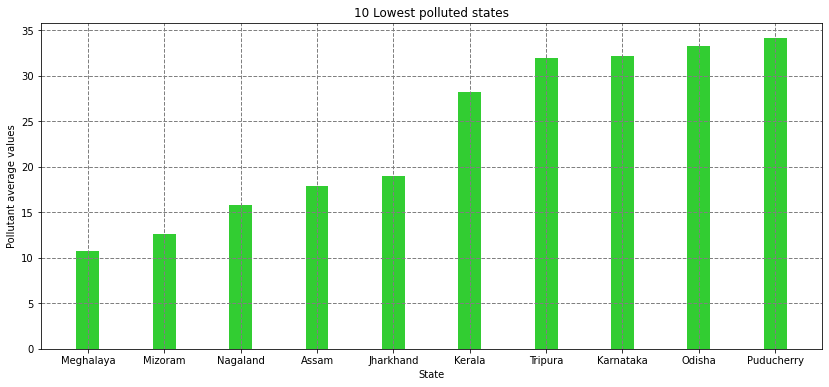

In [20]:
#10 lowest polluted states
lPol_state=df.groupby(['state'])['pollutant_avg'].mean().nsmallest(10).reset_index()
plt.figure(figsize=(14,6))
plt.bar(lPol_state['state'],lPol_state['pollutant_avg'],color='limegreen',width=0.3)
plt.title('10 Lowest polluted states')
plt.xlabel('State')
plt.ylabel('Pollutant average values')
plt.grid(True, color = "grey", linewidth = "1",ls='--')

In [21]:
#Highest polluted AQI Stations
df.groupby(['station'])['pollutant_avg'].mean().nlargest(10).reset_index()

,station,pollutant_avg
0,"Nehru Nagar, Kanpur - UPPCB",128.200000
1,"Jai Bhim Nagar, Meerut - UPPCB",114.142857
2,"Sanjay Nagar, Ghaziabad - UPPCB",111.714286
3,"Indirapuram, Ghaziabad - UPPCB",107.833333
4,"Police Commissionerate, Jaipur - RSPCB",106.500000
5,"Pusa, Delhi - IMD",106.200000
6,"New Mandi, Muzaffarnagar - UPPCB",104.857143
7,"Sector- 16A, Faridabad - HSPCB",103.000000
8,"Loni, Ghaziabad - UPPCB",101.428571
9,"Sanjay Palace, Agra - UPPCB",100.666667


In [22]:
#lowest polluted AQI stations
df.groupby(['station'])['pollutant_avg'].mean().nsmallest(10).reset_index()

,station,pollutant_avg
0,"Lumpyngngad, Shillong - Meghalaya PCB",10.750000
1,"Sikulpuikawn, Aizawl - Mizoram PCB",12.666667
2,"Railway Colony, Guwahati - APCB",14.285714
3,"PWD Juction, Kohima - NPCB",15.857143
4,"Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB",17.333333
5,"Tata Stadium, Jorapokhar - JSPCB",19.000000
6,"Vinoba Nagara, Shivamogga - KSPCB",20.285714
7,"IESD Banaras Hindu University, Varanasi - UPPCB",20.428571
8,"Kalyana Nagara, Chikkamagaluru - KSPCB",20.428571
9,"Deen Dayal Nagar, Sagar - MPPCB",20.500000


# Pollutant wise analysis

In [23]:
df_1['pollutant_id'].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

,id,pollutant_min,pollutant_max,pollutant_avg
count,252.000000,252.000000,252.000000,252.000000
mean,896.269841,55.384921,217.638889,123.873016
std,533.698960,34.577338,117.774620,71.631414
min,1.000000,1.000000,31.000000,11.000000
25%,434.250000,31.750000,95.000000,62.750000
50%,905.500000,50.000000,218.000000,107.500000
75%,1359.750000,73.000000,318.000000,176.250000
max,1830.000000,217.000000,500.000000,314.000000


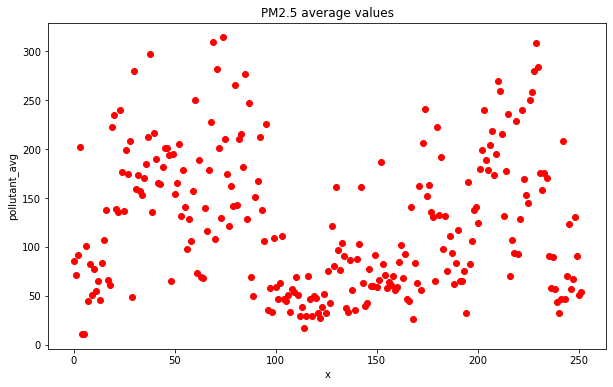

In [132]:
#PM 2.5
df_1.loc[df['pollutant_id'].str.contains('PM2.5')].describe()
a=df_1.loc[df['pollutant_id'].str.contains('PM2.5')]['pollutant_avg'].to_numpy()
x=np.linspace(0,251,252)
plt.figure(figsize=(10,6))
plt.scatter(x,a,color='r')
plt.title('PM2.5 average values')
plt.xlabel('x')
plt.ylabel('pollutant_avg')
df_1.loc[df['pollutant_id'].str.contains('PM2.5')].describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,245.000000,245.000000,245.000000,245.000000
mean,918.089796,78.546939,205.963265,125.236735
std,528.872920,40.525782,121.401223,61.030101
min,2.000000,1.000000,22.000000,6.000000
25%,449.000000,46.000000,117.000000,78.000000
50%,928.000000,74.000000,167.000000,116.000000
75%,1369.000000,111.000000,274.000000,164.000000
max,1831.000000,184.000000,500.000000,293.000000


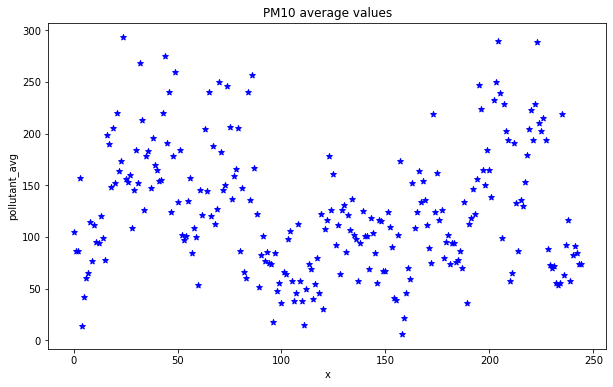

In [133]:
#PM10
b=df_1.loc[df['pollutant_id'].str.contains('PM10')]['pollutant_avg'].to_numpy()
x=np.linspace(0,244,245)
plt.figure(figsize=(10,6))
plt.scatter(x,b,color='b',marker='*')
plt.title('PM10 average values')
plt.xlabel('x')
plt.ylabel('pollutant_avg')
df_1.loc[df['pollutant_id'].str.contains('PM10')].describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,251.000000,251.000000,251.000000,251.000000
mean,892.175299,16.972112,60.780876,34.079681
std,530.469446,14.286890,52.681798,26.615815
min,3.000000,1.000000,2.000000,2.000000
25%,434.500000,7.000000,22.000000,16.000000
50%,884.000000,13.000000,44.000000,27.000000
75%,1342.500000,22.000000,83.000000,44.500000
max,1832.000000,75.000000,404.000000,195.000000


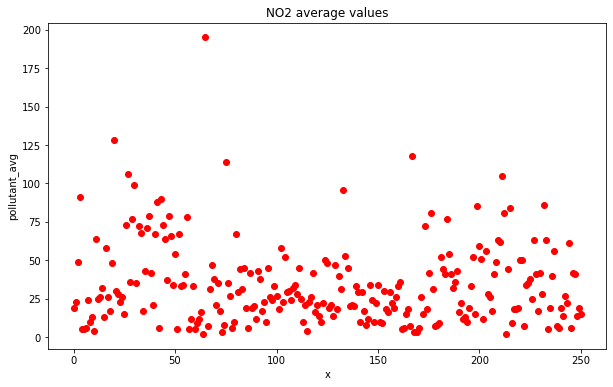

In [134]:
#NO2
c=df_1.loc[df['pollutant_id'].str.contains('NO2')]['pollutant_avg'].to_numpy()
x=np.linspace(0,250,251)
x_1=df_1['id'][0:251].to_numpy()
plt.figure(figsize=(10,6))
plt.scatter(x,c,color='r')
plt.title('NO2 average values')
plt.xlabel('x')
plt.ylabel('pollutant_avg')
df_1.loc[df['pollutant_id'].str.contains('NO2')].describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,218.000000,218.000000,218.000000,218.000000
mean,913.288991,3.917431,9.500000,5.825688
std,533.960504,3.288378,12.075511,4.965956
min,4.000000,1.000000,1.000000,1.000000
25%,457.750000,1.250000,3.000000,2.000000
50%,901.500000,3.000000,6.000000,5.000000
75%,1376.250000,6.000000,10.000000,7.000000
max,1833.000000,17.000000,109.000000,28.000000


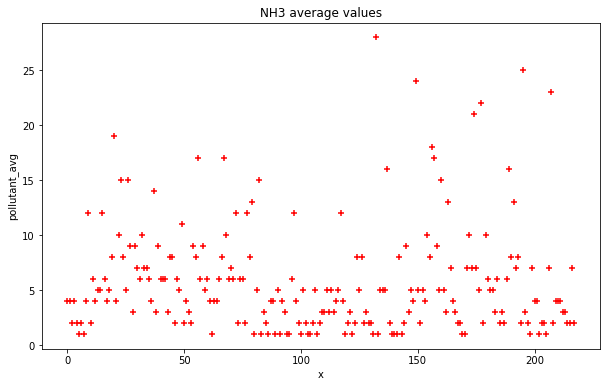

In [135]:
#NH3
d=df_1.loc[df['pollutant_id'].str.contains('NH3')]['pollutant_avg'].to_numpy()
x=np.linspace(0,217,218)
plt.figure(figsize=(10,6))
plt.scatter(x,d,color='r',marker='+')
plt.title('NH3 average values')
plt.xlabel('x')
plt.ylabel('pollutant_avg')
df_1.loc[df['pollutant_id'].str.contains('NH3')].describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,246.000000,246.000000,246.000000,246.000000
mean,911.930894,8.142276,26.463415,14.268293
std,532.706328,9.352948,27.112703,12.469439
min,5.000000,1.000000,2.000000,2.000000
25%,452.500000,2.000000,10.000000,6.000000
50%,902.500000,5.000000,17.500000,11.000000
75%,1377.250000,10.000000,31.000000,18.000000
max,1834.000000,82.000000,168.000000,88.000000


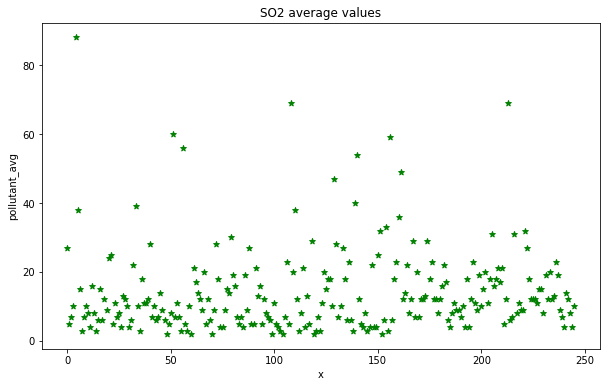

In [8]:
#SO2
e=df_1.loc[df['pollutant_id'].str.contains('SO2')]['pollutant_avg'].to_numpy()
x=np.linspace(0,245,246)
plt.figure(figsize=(10,6))
plt.scatter(x,e,color='g',marker='*')
plt.title('SO2 average values')
plt.xlabel('x')
plt.ylabel('pollutant_avg')
df_1.loc[df['pollutant_id'].str.contains('SO2')].describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,269.000000,269.000000,269.000000,269.000000
mean,910.438662,23.665428,80.375465,39.293680
std,525.789890,18.694509,36.297335,22.200729
min,6.000000,1.000000,2.000000,2.000000
25%,458.000000,12.000000,53.000000,24.000000
50%,914.000000,19.000000,78.000000,35.000000
75%,1356.000000,32.000000,107.000000,48.000000
max,1835.000000,102.000000,178.000000,136.000000


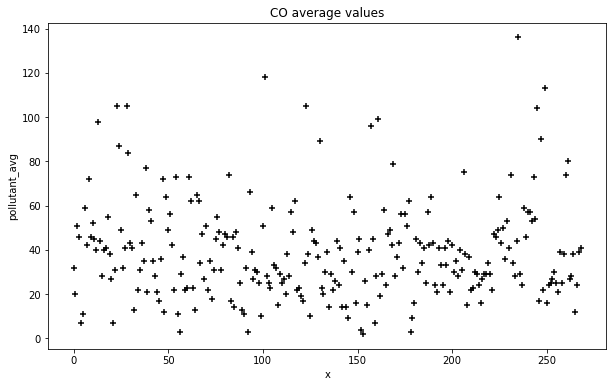

In [137]:
#CO
f=df_1.loc[df['pollutant_id'].str.contains('CO')]['pollutant_avg'].to_numpy()
x=np.linspace(0,268,269)
plt.figure(figsize=(10,6))
plt.scatter(x,f,color='k',marker='+')
plt.title('CO average values')
plt.xlabel('x')
plt.ylabel('pollutant_avg')
df_1.loc[df['pollutant_id'].str.contains('CO')].describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,257.000000,257.000000,257.000000,257.000000
mean,912.046693,10.505837,68.490272,32.000000
std,536.248745,11.579926,50.254206,29.763521
min,7.000000,1.000000,1.000000,1.000000
25%,442.000000,3.000000,34.000000,16.000000
50%,901.000000,7.000000,56.000000,26.000000
75%,1381.000000,15.000000,91.000000,38.000000
max,1836.000000,88.000000,372.000000,206.000000


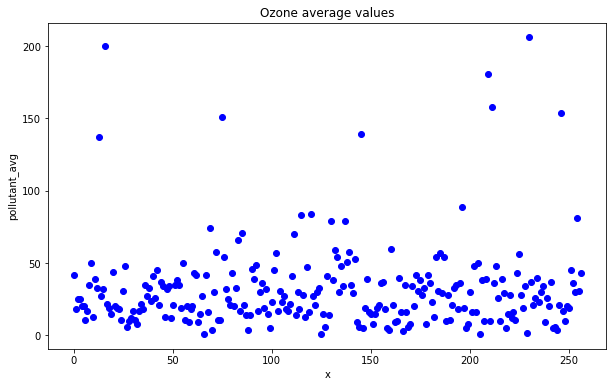

In [138]:
#OZONE
g=df_1.loc[df['pollutant_id'].str.contains('OZONE')]['pollutant_avg'].to_numpy()
x=np.linspace(0,256,257)
plt.figure(figsize=(10,6))
plt.scatter(x,g,color='b')
plt.title('Ozone average values')
plt.xlabel('x')
plt.ylabel('pollutant_avg')
df_1.loc[df['pollutant_id'].str.contains('OZONE')].describe()

# Predicting outliers

In [83]:
def outlier(data,k):
#upper and lower bound of data using Chebyshev's inequality
    out=[]
    mean=data.mean()
    sigma=np.sqrt(data.var())
    LB=mean-(k*sigma)
    UB=mean+(k*sigma)
#Identifying and listing the outliers
    for i in range(len(data)):           
        if (data[i]<LB) or (data[i]>UB):
            out.append(data[i])
            return out
print('outlier for k=2 is:',outlier(df['pollutant_avg'],2))
print('outlier for k=3 is:',outlier(df['pollutant_avg'],3))
print('outlier for k=4 is:',outlier(df['pollutant_avg'],4))
print('outlier for k=5 is:',outlier(df['pollutant_avg'],5))

outlier for k=2 is: [202.0]
outlier for k=3 is: [240.0]
outlier for k=4 is: [309.0]
outlier for k=5 is: None


# Prediction of pollutant using linear regression

In [24]:
del df_1["last_update"]
df_1["country"] = df_1["country"].astype(str)
df_1["state"] = df_1["state"].astype(str)
df_1["city"] = df_1["city"].astype(str)
df_1["station"] = df_1["station"].astype(str)
df_1["pollutant_id"]=df_1["pollutant_id"].astype(str)
number = preprocessing.LabelEncoder()
df_1["country"] = number.fit_transform(df_1["country"])
df_1["state"] = number.fit_transform(df_1["state"])
df_1["city"] = number.fit_transform(df_1["city"])
df_1["station"] = number.fit_transform(df_1["station"])
df_1["pollutant_id"]=number.fit_transform(df_1["pollutant_id"])

X=df_1.loc[df_1['pollutant_id']==5].drop(['pollutant_avg'],axis=1).values
Y=df_1.loc[df_1['pollutant_id']==5]['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value of PM 2.5 is:',model.score(X_test,Y_test)*100)

<ipython-input-24-446d6ab90f8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["country"] = df_1["country"].astype(str)
<ipython-input-24-446d6ab90f8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["state"] = df_1["state"].astype(str)
<ipython-input-24-446d6ab90f8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

average pollutant value of PM 2.5 is: 92.11013991816823


In [25]:
X=df_1.loc[df_1['pollutant_id']==4].drop(['pollutant_avg'],axis=1).values
Y=df_1.loc[df_1['pollutant_id']==4]['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value of PM 10 is:',model.score(X_test,Y_test)*100)

average pollutant value of PM 10 is: 96.51098734861068


In [26]:
X=df_1.loc[df_1['pollutant_id']==2].drop(['pollutant_avg'],axis=1).values
Y=df_1.loc[df_1['pollutant_id']==2]['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value of NO2 is:',model.score(X_test,Y_test)*100)

average pollutant value of NO2 is: 95.40252056862515


In [27]:
X=df_1.loc[df_1['pollutant_id']==1].drop(['pollutant_avg'],axis=1).values
Y=df_1.loc[df_1['pollutant_id']==1]['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value of NH3 is:',model.score(X_test,Y_test)*100)

average pollutant value of NH3 is: 93.96469443875813


In [28]:
X=df_1.loc[df_1['pollutant_id']==6].drop(['pollutant_avg'],axis=1).values
Y=df_1.loc[df_1['pollutant_id']==6]['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value of SO2 is:',model.score(X_test,Y_test)*100)

average pollutant value of SO2 is: 92.9842501700696


In [29]:
X=df_1.loc[df_1['pollutant_id']==0].drop(['pollutant_avg'],axis=1).values
Y=df_1.loc[df_1['pollutant_id']==0]['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value of CO is:',model.score(X_test,Y_test)*100)

average pollutant value of CO is: 77.55071513179897


In [30]:
X=df_1.loc[df_1['pollutant_id']==3].drop(['pollutant_avg'],axis=1).values
Y=df_1.loc[df_1['pollutant_id']==3]['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value of OZONE is:',model.score(X_test,Y_test)*100)

average pollutant value of OZONE is: 79.69872117595071


In [31]:
X=df_1.drop(['pollutant_avg'],axis=1).values
Y=df_1['pollutant_avg'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.20)
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
print('average pollutant value for linear regression is:',model.score(X_test,Y_test)*100)

average pollutant value for linear regression is: 93.5940249707981


The  Average pollutant value is found out to be 93.6 using linear regression

# KNN for Classification 

In [21]:
# For Classification ,we created the class as follows:
# AQI Category AQI Range   Class label
# Good         0 – 50               0
# Satisfactory 51 – 100             1
# Moderate     101 – 200            2
# Poor         201 – 300            3
# Very Poor    301 – 400            4
# Severe       401 - 500            5
#The Range is taken as set by the Indian Government.The link for AQI range is given below:
#https://pib.gov.in/newsite/printrelease.aspx?relid=110654

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Creating Class label 0
df_g=df_1[df_1['pollutant_avg']<=50]
df_g.reset_index(inplace=True)
a_0=np.zeros((1149,1))
df_a=pd.DataFrame(a_0,columns=['AQI Category'])
df_a=pd.concat([df_g,df_a],axis=1)
df_a

,index,id,country,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,AQI Category
0,2,3,0,0,6,214,2,10.0,42.0,19.0,0.0
1,3,4,0,0,6,214,1,4.0,5.0,4.0,0.0
2,4,5,0,0,6,214,6,16.0,42.0,27.0,0.0
3,5,6,0,0,6,214,0,15.0,45.0,32.0,0.0
4,6,7,0,0,6,214,3,4.0,82.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1144,1831,1832,0,25,77,268,2,10.0,22.0,15.0,0.0
1145,1832,1833,0,25,77,268,1,1.0,3.0,2.0,0.0
1146,1833,1834,0,25,77,268,6,6.0,28.0,10.0,0.0
1147,1834,1835,0,25,77,268,0,34.0,92.0,41.0,0.0


In [24]:
#Creating Class label 1
df_s=df_1[(df_1['pollutant_avg']>50) &(df_1['pollutant_avg']<=100)]
df_s.reset_index(inplace=True)
a_1=np.zeros((284,1))+1
df_b=pd.DataFrame(a_1,columns=['AQI Category'])
df_b=pd.concat([df_s,df_b],axis=1)
df_b

,index,id,country,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,AQI Category
0,0,1,0,0,6,214,5,69.0,109.0,86.0,1.0
1,7,8,0,0,113,3,5,47.0,111.0,71.0,1.0
2,8,9,0,0,113,3,4,49.0,120.0,86.0,1.0
3,14,15,0,0,130,261,5,76.0,131.0,92.0,1.0
4,15,16,0,0,130,261,4,66.0,120.0,86.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
279,1821,1822,0,25,77,194,3,22.0,372.0,81.0,1.0
280,1822,1823,0,25,77,195,5,32.0,69.0,51.0,1.0
281,1823,1824,0,25,77,195,4,50.0,91.0,74.0,1.0
282,1829,1830,0,25,77,268,5,28.0,75.0,54.0,1.0


In [25]:
#Creating Class label 2
df_m=df_1[(df_1['pollutant_avg']>100)& (df_1['pollutant_avg']<=200)]
df_m.reset_index(inplace=True)
a_2=np.zeros((226,1))+2
df_c=pd.DataFrame(a_2,columns=['AQI Category'])
df_c=pd.concat([df_m,df_c],axis=1)
df_c

,index,id,country,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,AQI Category
0,1,2,0,0,6,214,4,82.0,138.0,105.0,2.0
1,22,23,0,0,138,65,4,77.0,276.0,157.0,2.0
2,41,42,0,2,43,48,5,52.0,282.0,101.0,2.0
3,73,74,0,2,107,50,4,76.0,148.0,114.0,2.0
4,87,88,0,2,107,149,4,57.0,136.0,111.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
221,1690,1691,0,24,101,223,0,76.0,146.0,113.0,2.0
222,1753,1754,0,25,10,10,3,23.0,154.0,154.0,2.0
223,1773,1774,0,25,56,69,5,51.0,300.0,123.0,2.0
224,1774,1775,0,25,56,69,4,58.0,284.0,116.0,2.0


In [26]:
#Creating Class label 3
df_p=df_1[(df_1['pollutant_avg']>200)& (df_1['pollutant_avg']<=300)]
df_p.reset_index(inplace=True)
a_3=np.zeros((76,1))+3
df_d=pd.DataFrame(a_3,columns=['AQI Category'])
df_d=pd.concat([df_p,df_d],axis=1)
df_d

,index,id,country,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,AQI Category
0,21,22,0,0,138,65,5,78.0,312.0,202.0,3.0
1,126,127,0,5,33,2,5,88.0,315.0,223.0,3.0
2,133,134,0,5,33,4,5,113.0,344.0,235.0,3.0
3,152,153,0,5,33,22,5,83.0,348.0,240.0,3.0
4,153,154,0,5,33,22,4,133.0,423.0,205.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
71,1667,1668,0,24,101,215,4,136.0,352.0,210.0,3.0
72,1674,1675,0,24,101,216,4,131.0,368.0,202.0,3.0
73,1679,1680,0,24,101,221,4,152.0,377.0,215.0,3.0
74,1740,1741,0,24,139,168,5,81.0,339.0,208.0,3.0


In [27]:
#Creating Class label 4
df_v=df_1[df_1['pollutant_avg']>300]
df_v.reset_index(inplace=True)
a_4=np.zeros((3,1))+4
df_e=pd.DataFrame(a_4,columns=['AQI Category'])
df_e=pd.concat([df_v,df_e],axis=1)
df_e

,index,id,country,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,AQI Category
0,473,474,0,7,15,159,5,53.0,403.0,309.0,4.0
1,508,509,0,7,39,217,5,217.0,406.0,314.0,4.0
2,1652,1653,0,24,92,118,5,182.0,392.0,308.0,4.0


In [28]:
df_k=pd.concat([df_a,df_b,df_c,df_d,df_e],axis=0)
df_k

,index,id,country,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,AQI Category
0,2,3,0,0,6,214,2,10.0,42.0,19.0,0.0
1,3,4,0,0,6,214,1,4.0,5.0,4.0,0.0
2,4,5,0,0,6,214,6,16.0,42.0,27.0,0.0
3,5,6,0,0,6,214,0,15.0,45.0,32.0,0.0
4,6,7,0,0,6,214,3,4.0,82.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
74,1740,1741,0,24,139,168,5,81.0,339.0,208.0,3.0
75,1741,1742,0,24,139,168,4,110.0,450.0,219.0,3.0
0,473,474,0,7,15,159,5,53.0,403.0,309.0,4.0
1,508,509,0,7,39,217,5,217.0,406.0,314.0,4.0


In [29]:
#For Feature Normalization
scaler = StandardScaler()
scaler.fit(df_k.drop("AQI Category",axis=1))
scaled_feat=scaler.transform(df_k.drop('AQI Category',axis=1))

#Split the data into Training and Testing set
X_Train,X_Test,Y_Train,Y_Test=train_test_split(scaled_feat,df_k["AQI Category"],test_size=0.2)
df_feat=pd.DataFrame(scaled_feat,columns=df_k.columns[:-1])

Text(0, 0.5, 'Error rate')

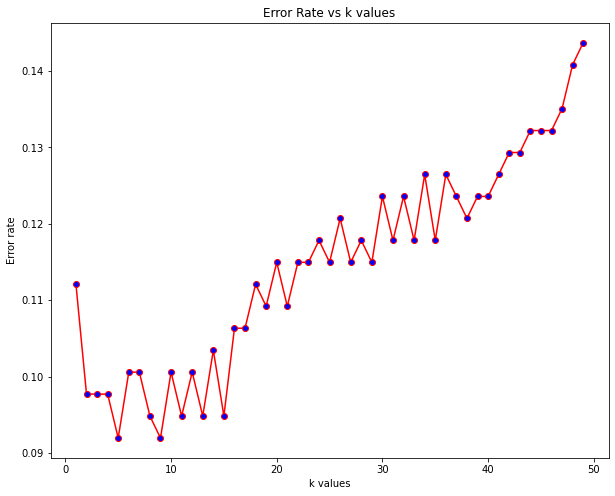

In [30]:
#For Calculation of optimum k
error_rate = []
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Train,Y_Train)
    pred_i = knn.predict(X_Test)
    error_rate.append(np.mean(pred_i != Y_Test))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

#error rate vs k plot
plt.plot(range(1,50),error_rate,'r',marker="o",markerfacecolor='b')
plt.title("Error Rate vs k values")
plt.xlabel("k values")
plt.ylabel("Error rate")

In [31]:
#Prediction using KNN
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_Train,Y_Train)
pred=knn.predict(X_Test)
pd.concat((pd.DataFrame(pred,columns=['Actual Class']),pd.DataFrame(Y_Test.to_numpy(),columns=['Predicted Class'])),axis=1)

,Actual Class,Predicted Class
0,0.0,0.0
1,2.0,2.0
2,0.0,0.0
3,0.0,0.0
4,1.0,2.0
...,...,...
343,0.0,0.0
344,0.0,0.0
345,0.0,0.0
346,0.0,0.0


In [32]:
#KNN Accuracy
k=7
a=knn.score(X_Test,Y_Test)*100
print('optimum k is:',k)
print('Accuracy:{} %'.format(a))

optimum k is: 7
Accuracy:89.9425287356322 %


In [33]:
#Confusion matrix
con=confusion_matrix(Y_Test,pred)
print("CONFUSION MATRIX:\n",con)

CONFUSION MATRIX:
 [[235   7   0   0   0]
 [  8  35   1   0   0]
 [  0  12  34   2   0]
 [  0   0   4   9   0]
 [  0   0   0   1   0]]


<AxesSubplot:>

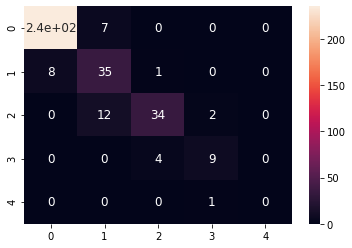

In [35]:
sns.heatmap(con, annot=True,annot_kws={'size':12})